# Student Employment After College - A Visualization Analysis Project

In this project, we will be analyzing a dataset consisting of job outcomes of students who graduated from college between 2010 and 2012. We are going to explore the answers to questions such as:

- Do students in more popular majors make more money?
- How many major are predominantly male? Predominantly female?
- Which category of majors have the most students?

Instead of analyzing just by looking at a table, this project will focus on inferencing results from visualizations supplied by Pandas and Matplotlib. 

You can find the data [here](https://github.com/fivethirtyeight/data/tree/master/college-majors)

Let's begin with exploring the data

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

Most of the data are numerical. The majority of the numerical fields are integers, but a few are floats. the only string, or object, fields are *Major* and *Major Category*. 

Just from looking at it, it's impossible to tell what's going on and therefore impossible to answer the questions we have.

Let's continue by cleaning the data a little. We will remove all rows with null values. We do this because matplotlib expects all columns to be of equal length when creating the necessary visualizations and null values will skew that.

In [62]:
#Drop rows with missing values
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print("Before: ", raw_data_count)
print("After: ", cleaned_data_count)

Before:  173
After:  172


## Scatterplot Analysis

First, we will generate some scatterplots to answer the following questions:

- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

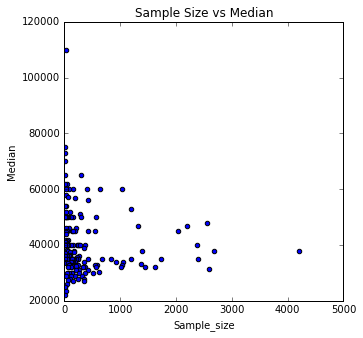

In [63]:
recent_grads.plot(x = "Sample_size", y = "Median", kind = "scatter", 
                 title = "Sample Size vs Median", figsize = (5, 5), 
                xlim = (0, 5000), ylim = (20000, 120000))

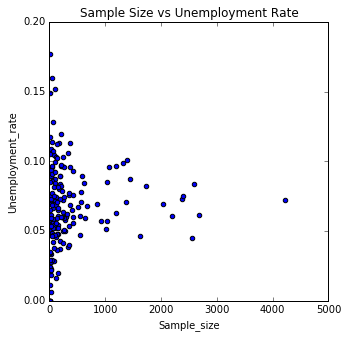

In [64]:
recent_grads.plot(x = "Sample_size", y = "Unemployment_rate", kind = "scatter", 
                 title = "Sample Size vs Unemployment Rate", figsize = (5, 5), 
                xlim = (0, 5000), ylim = (0, .2))

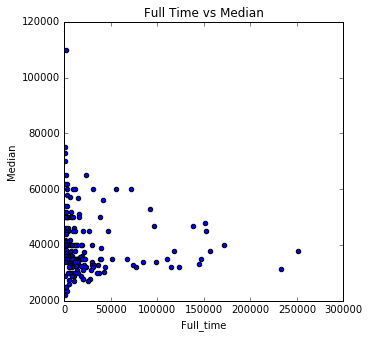

In [65]:
recent_grads.plot(x = "Full_time", y = "Median", kind = "scatter", 
                 title = "Full Time vs Median", figsize = (5, 5),
                 xlim = (0, 300000), ylim = (20000, 120000))

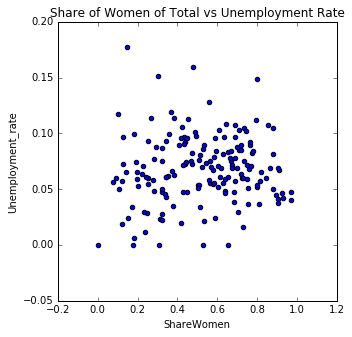

In [66]:
recent_grads.plot(x = "ShareWomen", y = "Unemployment_rate", kind = "scatter", 
                 title = "Share of Women of Total vs Unemployment Rate", 
                figsize = (5, 5))

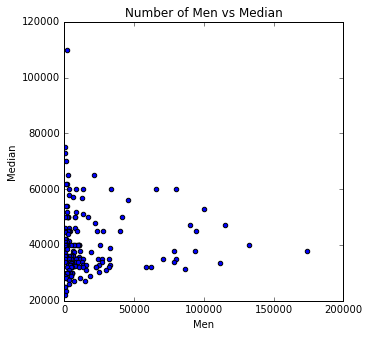

In [67]:
recent_grads.plot(x = "Men", y = "Median", kind = "scatter", 
                 title = "Number of Men vs Median", figsize = (5, 5),
                 xlim = (0, 200000), ylim = (20000, 120000))

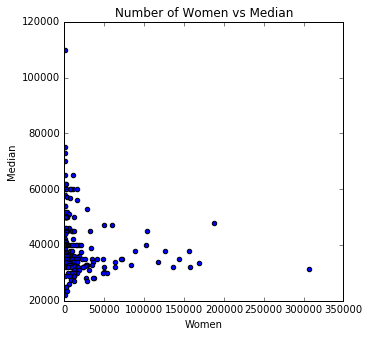

In [68]:
recent_grads.plot(x = "Women", y = "Median", kind = "scatter", 
                 title = "Number of Women vs Median", figsize = (5, 5), 
                  xlim = (0, 350000), ylim = (20000, 120000))

Answers to the above questions:

- Do students in more popular majors make more money?

A: From looking at the plots, the majority of the points in the lower left quadrant, signifying that the most of the majors make a lower amount of money, therefore showing the possibility of students in more popular majors making less money than those in less popular majors.

- Do students that majored in subjects that were majority female make more money?

A: It is impossible to determine whether students that majored in subjects that were majority female make more money or not. 

- Is there any link between the number of full-time employees and median salary?

A: Most of the majors that have between 0 and 50,000 full-time employments make a low amount of money; around 20,000 - 40,000. However, there does not seem to be a link between full time employment and median salary.

## Histogram Analysis

Now, we will create some histogram to answer the question:

- How many majors are predominantly male? Predominantly female?

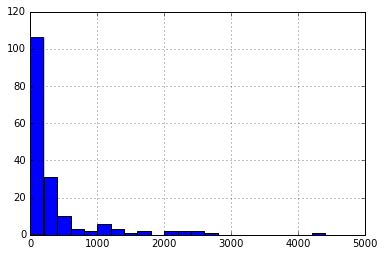

In [69]:
recent_grads['Sample_size'].hist(bins = 25, range = (0, 5000))

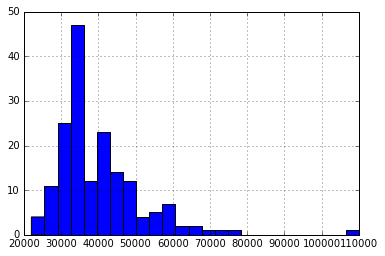

In [70]:
recent_grads['Median'].hist(bins = 25)

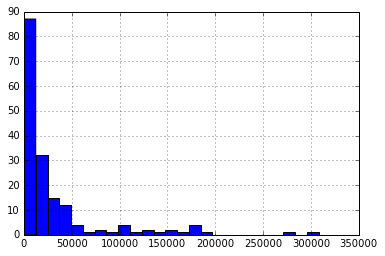

In [71]:
recent_grads['Employed'].hist(bins = 25)

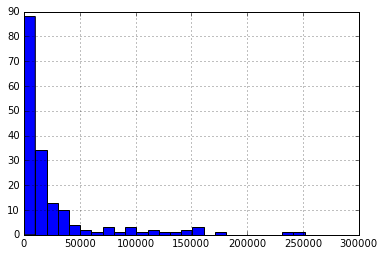

In [72]:
recent_grads['Full_time'].hist(bins = 25)

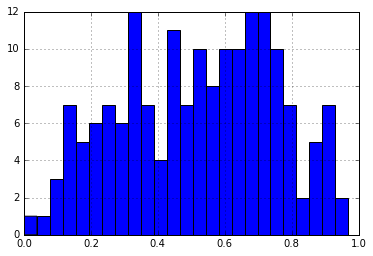

In [73]:
recent_grads['ShareWomen'].hist(bins = 25)

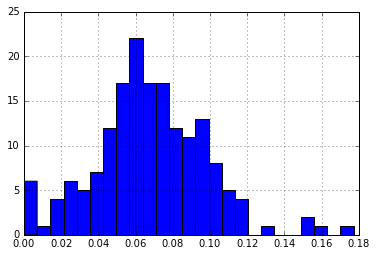

In [74]:
recent_grads['Unemployment_rate'].hist(bins = 25)

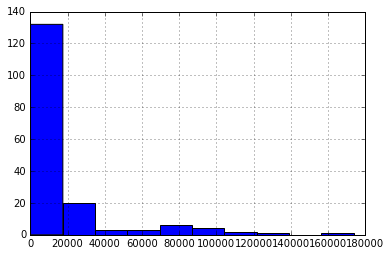

In [75]:
recent_grads['Men'].hist(bins = 10)

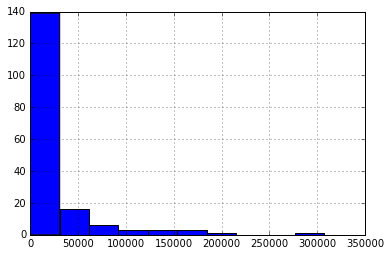

In [76]:
recent_grads['Women'].hist(bins = 10)

Answer to the question:

- How many majors are predominantly male? Predominantly female?

A: For men, it looks like around 130 majors are predominantly male. For women, it looks like around 140 majors are predominantly female.

## Scatter Matrix Visualization

A scatter matrix is a visualization that shows a combination of scatter plots and histograms for the given data. It is much easier to understand by looking at what they are.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cc4a36e10>,
      dtype=object)

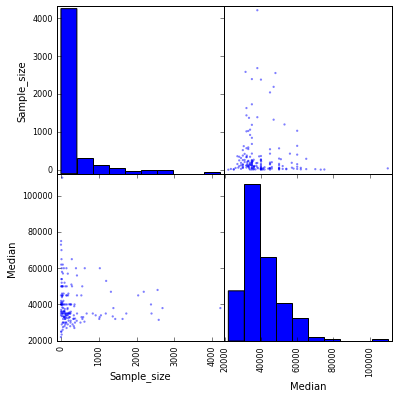

In [80]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize = (6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cc47a6f60>,
      dtype=object)

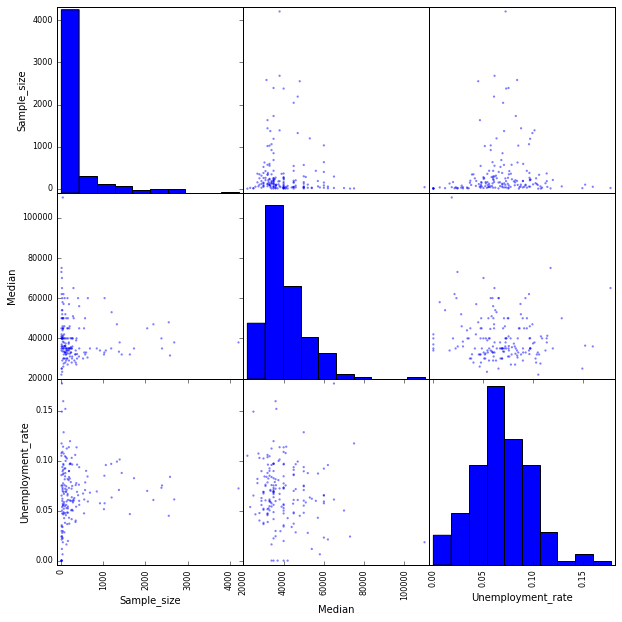

In [82]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize = (10,10))

An insight that can be inferred from the above scatter matrix:

- Looking at the histogram in the middle, we can see that the majority of majors make a low amount of money. This further solidifies the answer we gave when we analyzed the scatter plots that the more popular majors make less money.

## Bar Plots

Lastly, we will create some bar plots to answer the last question:

- Which category of majors have the most students?

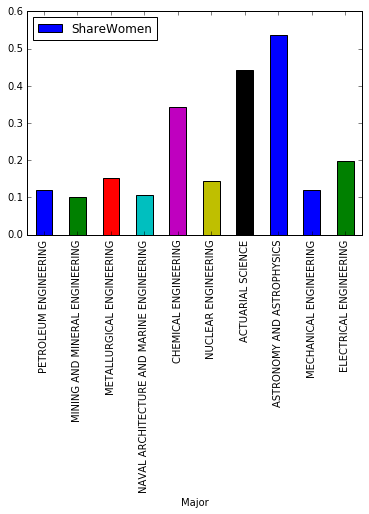

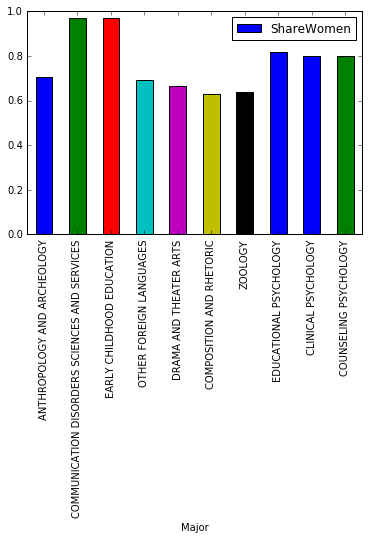

In [87]:
recent_grads[:10].plot.bar(x = "Major", y = "ShareWomen")
recent_grads[-11:-1].plot.bar(x = "Major", y = "ShareWomen")

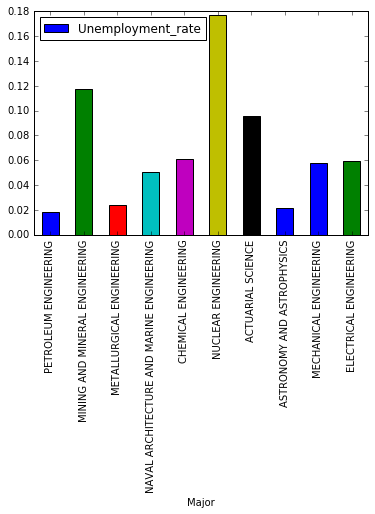

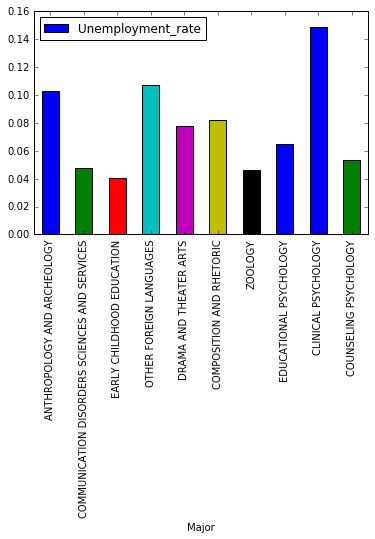

In [88]:
recent_grads[:10].plot.bar(x = "Major", y = "Unemployment_rate")
recent_grads[-11:-1].plot.bar(x = "Major", y = "Unemployment_rate")

In [ ]:
fig = plt.figure(5, 10)

